# Copy items-Copy1.csv file into pandas dataframe and 
# replace all fields that are empty with NaN

In [1]:
import pandas as pd
import numpy as np

# read dataset into pandas dataframe
df_items = pd.read_csv('items-Copy1.csv')

# replace field that's entirely space (or empty) with NaN
df_items = df_items.replace(np.nan, '', regex=True)

data_text = df_items[['description']]
data_text['index'] = data_text.index

documents = data_text

/Users/tobbylie/opt/anaconda3/envs/russian_disinformation_env/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [2]:
len(documents)

3012

In [3]:
documents[:5]

,description,index
0,Black American racial experience is real. We s...,0
1,The best costume for Halloween worth posting. ...,1
2,"Keep on whining and crying for your president,...",2
3,"End the whining and crying, end the riots with...",3
4,Black girls are the definition of national gre...,4


# Need to perform the following steps:
1. Tokenization -- split text into sequences and sentences into words.
    Lowercase all words and remove punctuation.
2. Remove words with fewer than 3 characters
3. Remove stopwords
4. Lemmatize words -- words in third person are changed to first person
    and verbs in past and future tenses are changed into present.
5. Stem words --  words are reduced to root form.

## gensim and nltk libraries will be used to 
## implement this.

In [4]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

In [5]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tobbylie/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Lemmatize example

In [6]:
print(WordNetLemmatizer().lemmatize('went', pos='v'))

go


# Stemmer Example

In [7]:
stemmer = SnowballStemmer('english')
original_words = ['caresses', 'flies', 'dies', 'mules', 'denied', 'died', 'agreed', 'owned',
                  'humbled', 'sized', 'meeting', 'stating', 'siezing', 'itemization', 'sensational',
                  'traditional', 'reference', 'colonizer', 'plotted']
singles = [stemmer.stem(plural) for plural in original_words]
pd.DataFrame(data={'original word': original_words, 'stemmed': singles})

,original word,stemmed
0,caresses,caress
1,flies,fli
2,dies,die
3,mules,mule
4,denied,deni
5,died,die
6,agreed,agre
7,owned,own
8,humbled,humbl
9,sized,size


# Function in order to lemmatize and stem
# preprocess on the dataset

In [8]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

In [9]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

# Initialize stemmer

In [10]:
stemmer = SnowballStemmer('english')

# Display before and after of preprocessing on
# example document

In [11]:
doc_sample = documents[documents['index'] == 3].values[0][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)

print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['End', 'the', 'whining', 'and', 'crying,', 'end', 'the', 'riots', 'with', 'these', 'same', 'white\npeople(democrats),', 'who', 'will', 'not', 'march', 'with', 'you', 'when', 'your', 'son,', 'daughter', 'or\nloved', 'one', 'gets', 'shot', 'for', 'being', 'Black.\n\nI', 'opted', 'out', 'of', 'the', 'elections', 'and', 'i', 'had', 'many', 'Black', 'people', 'all', 'up', 'in', 'my', 'case,\ntelling', 'me', 'how', 'i', 'was', 'wrong', 'and', 'how', 'i', 'needed', 'to', 'make', 'my', 'vote', 'count', 'for', 'Mrs.\nClinton,', 'all', 'just', 'to', 'make', 'sure', 'Trump', "doesn't", 'become', 'president.\n\nWell', 'now', 'all', 'i', 'want', 'to', 'say', 'is', 'get', 'over', 'Trump', 'and', 'Clinton,', 'they', 'are', 'rich', 'white\npeople,', 'the', 'elite', 'who', 'were', 'born', 'into', 'and', 'are', 'a', 'part', 'of', 'the', 'system.\n\nI', 'dream', 'of', 'liberation,', 'not', 'staying', 'a', 'slave', 'under', 'Hillary', 'or', 'Trump,', 'so', 'forget\nyour', 'Childish', 

# Preprocess all description field text
# Save result in 'processed_docs'

In [12]:
processed_docs = documents['description'].map(preprocess)
processed_docs[:10]

0    [black, american, racial, experi, real, suppor...
1    [best, costum, halloween, worth, post, power, ...
2    [whine, cri, presid, wasn, elect, imma, care, ...
3    [whine, cri, riot, white, peopl, democrat, mar...
4                [black, girl, definit, nation, great]
5    [imma, stay, comfi, untouch, work, hard, care,...
6    [disgust, video, circul, internet, show, unide...
7                           [imit, life, photo, great]
8    [america, racial, oppress, racism, ancient, hi...
9    [donald, john, trump, elect, presid, unit, sta...
Name: description, dtype: object

# Create Bag of Words with Data set
## Start with creating dictionary with number of times a word appears in training set then filter out tokens that appear in:

1. less than 15 documents OR
2. more than 0.5 documents

### * Keep only first 100000 most frequent tokens

In [13]:
dictionary = gensim.corpora.Dictionary(processed_docs)

dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

# Utilize doc2bow from gensim 

In [14]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[3000]

[(7, 1),
 (16, 1),
 (113, 1),
 (135, 1),
 (147, 1),
 (161, 2),
 (233, 1),
 (252, 1),
 (360, 1),
 (375, 1),
 (406, 3),
 (438, 1),
 (478, 1),
 (494, 1),
 (509, 1),
 (518, 1),
 (596, 1),
 (602, 1)]

# Preview BoW from sample preprocessed document

In [15]:
bow_doc_3000 = bow_corpus[3000]
for i in range(len(bow_doc_3000)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_3000[i][0],
                                                     dictionary[bow_doc_3000[i][0]],
                                                     bow_doc_3000[i][1]))

Word 7 ("peopl") appears 1 time.
Word 16 ("educ") appears 1 time.
Word 113 ("month") appears 1 time.
Word 135 ("free") appears 1 time.
Word 147 ("prove") appears 1 time.
Word 161 ("communiti") appears 2 time.
Word 233 ("believ") appears 1 time.
Word 252 ("proud") appears 1 time.
Word 360 ("meet") appears 1 time.
Word 375 ("charlott") appears 1 time.
Word 406 ("legal") appears 3 time.
Word 438 ("have") appears 1 time.
Word 478 ("announc") appears 1 time.
Word 494 ("basi") appears 1 time.
Word 509 ("provid") appears 1 time.
Word 518 ("night") appears 1 time.
Word 596 ("empow") appears 1 time.
Word 602 ("focus") appears 1 time.


# Create tf-idf model using models.tfidfmodel on
# bow_corpus

In [16]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
# from pprint import pprint
# for doc in corpus_tfidf:
#     pprint(doc)

# Train LDA model using gensim.models.LdaMulticore
# Save to 'lda_model'

In [17]:
lda_model = gensim.models.LdaMulticore(
    bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

# For each topic, explore the words occuring in that
# topic and the relative weight

In [18]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.029*"black" + 0.019*"like" + 0.016*"life" + 0.015*"join" + 0.014*"need" + 0.014*"year" + 0.013*"free" + 0.013*"stop" + 0.011*"peopl" + 0.011*"communiti"
Topic: 1 
Words: 0.086*"black" + 0.044*"communiti" + 0.037*"matter" + 0.025*"support" + 0.024*"join" + 0.019*"life" + 0.018*"live" + 0.017*"patriot" + 0.015*"polic" + 0.015*"year"
Topic: 2 
Words: 0.027*"defens" + 0.025*"school" + 0.025*"free" + 0.023*"seif" + 0.022*"join" + 0.021*"class" + 0.019*"friend" + 0.018*"bring" + 0.018*"feel" + 0.017*"event"
Topic: 3 
Words: 0.027*"black" + 0.024*"https" + 0.020*"facebook" + 0.020*"follow" + 0.017*"america" + 0.015*"william" + 0.015*"peopl" + 0.012*"twitter" + 0.012*"communiti" + 0.012*"proud"
Topic: 4 
Words: 0.021*"repost" + 0.018*"like" + 0.016*"offic" + 0.013*"woman" + 0.013*"live" + 0.012*"news" + 0.012*"transgend" + 0.011*"black" + 0.011*"polic" + 0.010*"shoot"
Topic: 5 
Words: 0.024*"https" + 0.023*"follow" + 0.016*"american" + 0.015*"peopl" + 0.013*"instagram" + 0.0

# Attempt distinguishing topics using words in each topic and their corresponding weights Run LDA using tf-idf

In [19]:
lda_model_tfidf = gensim.models.LdaMulticore(
    corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.021*"black" + 0.017*"matter" + 0.013*"polic" + 0.013*"girl" + 0.012*"year" + 0.012*"live" + 0.010*"nation" + 0.009*"join" + 0.008*"educ" + 0.008*"say"
Topic: 1 Word: 0.018*"join" + 0.018*"beauti" + 0.018*"black" + 0.015*"proud" + 0.014*"want" + 0.013*"heart" + 0.013*"america" + 0.011*"texa" + 0.011*"live" + 0.011*"girl"
Topic: 2 Word: 0.016*"immigr" + 0.014*"welcom" + 0.014*"music" + 0.014*"free" + 0.014*"facemus" + 0.013*"listen" + 0.012*"communiti" + 0.012*"meme" + 0.011*"need" + 0.011*"support"
Topic: 3 Word: 0.023*"muslim" + 0.023*"polic" + 0.017*"brutal" + 0.013*"right" + 0.013*"black" + 0.013*"agre" + 0.011*"free" + 0.011*"proud" + 0.010*"https" + 0.010*"train"
Topic: 4 Word: 0.014*"stand" + 0.013*"racism" + 0.012*"tell" + 0.011*"black" + 0.011*"student" + 0.011*"truth" + 0.010*"injustic" + 0.010*"goal" + 0.009*"love" + 0.009*"south"
Topic: 5 Word: 0.027*"like" + 0.015*"real" + 0.015*"black" + 0.014*"https" + 0.014*"news" + 0.013*"american" + 0.013*"refuge" + 0.0

# Evaluate performance by classifying sample
# document using LDA BoW model

In [20]:
processed_docs[3000]

['proud',
 'announc',
 'initi',
 'focus',
 'provid',
 'free',
 'legal',
 'educ',
 'empow',
 'peopl',
 'strengthen',
 'communiti',
 'believ',
 'have',
 'legal',
 'workshop',
 'month',
 'basi',
 'prove',
 'benefici',
 'tangibl',
 'communiti',
 'meet',
 'charlott',
 'legal',
 'night']

In [21]:
for index, score in sorted(lda_model[bow_corpus[3000]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(
        score, lda_model.print_topic(index, 10)))


Score: 0.9590823650360107	 
Topic: 0.027*"black" + 0.024*"https" + 0.020*"facebook" + 0.020*"follow" + 0.017*"america" + 0.015*"william" + 0.015*"peopl" + 0.012*"twitter" + 0.012*"communiti" + 0.012*"proud"


# Evaluate performance by classifying sample
# document using LDA tf-idf model

In [22]:
for index, score in sorted(lda_model_tfidf[bow_corpus[3000]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(
        score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.9590776562690735	 
Topic: 0.016*"immigr" + 0.014*"welcom" + 0.014*"music" + 0.014*"free" + 0.014*"facemus" + 0.013*"listen" + 0.012*"communiti" + 0.012*"meme" + 0.011*"need" + 0.011*"support"


# Test model on unseen document

In [23]:
unseen_document = 'Black Facebook employees complain racism, discrimination have gotten worse'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(
        score, lda_model.print_topic(index, 5)))

Score: 0.5863615870475769	 Topic: 0.027*"black" + 0.024*"https" + 0.020*"facebook" + 0.020*"follow" + 0.017*"america"
Score: 0.28024429082870483	 Topic: 0.027*"right" + 0.022*"american" + 0.018*"polic" + 0.016*"peopl" + 0.014*"share"
Score: 0.01667768321931362	 Topic: 0.086*"black" + 0.044*"communiti" + 0.037*"matter" + 0.025*"support" + 0.024*"join"
Score: 0.016677509993314743	 Topic: 0.066*"black" + 0.025*"polic" + 0.024*"peopl" + 0.014*"white" + 0.013*"shoot"
Score: 0.01667550578713417	 Topic: 0.024*"https" + 0.023*"follow" + 0.016*"american" + 0.015*"peopl" + 0.013*"instagram"
Score: 0.01667470484972	 Topic: 0.027*"defens" + 0.025*"school" + 0.025*"free" + 0.023*"seif" + 0.022*"join"
Score: 0.016674108803272247	 Topic: 0.045*"free" + 0.040*"stop" + 0.028*"black" + 0.027*"facemus" + 0.025*"music"
Score: 0.01667366549372673	 Topic: 0.029*"black" + 0.019*"like" + 0.016*"life" + 0.015*"join" + 0.014*"need"
Score: 0.016671180725097656	 Topic: 0.033*"polic" + 0.022*"join" + 0.022*"stop" 

# Let's explore the words in the description field and form a word cloud to get a visual representation of the most common words
# Let's first remove punctuation and lowercase the words

In [24]:
# Load the regular expression library
import re
# Remove punctuation
documents['description_processed'] = documents['description'].map(
    lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
documents['description_processed'] = documents['description_processed'].map(
    lambda x: x.lower())
# Print out the first rows of papers
documents['description_processed'].head()

/Users/tobbylie/opt/anaconda3/envs/russian_disinformation_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/tobbylie/opt/anaconda3/envs/russian_disinformation_env/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    black american racial experience is real we su...
1    the best costume for halloween worth posting p...
2    keep on whining and crying for your president ...
3    end the whining and crying end the riots with ...
4    black girls are the definition of national gre...
Name: description_processed, dtype: object

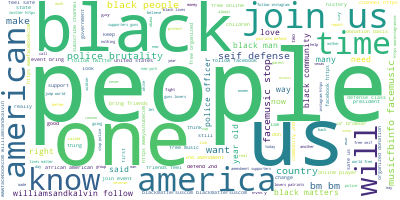

In [25]:
from wordcloud import WordCloud

# Join the different processed descriptions together
long_string = ','.join(list(documents['description_processed'].values))

# Create WordCloud object
wordcloud = WordCloud(background_color='white', max_words=5000,
                      contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloude
wordcloud.to_image()

# Plot ten most frequent words based on documents

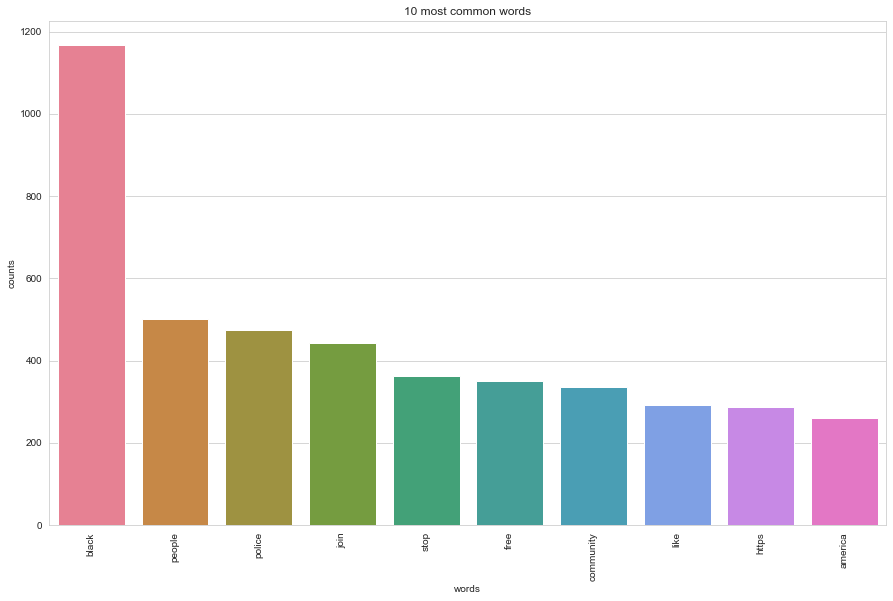

In [26]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts += t.toarray()[0]

    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x: x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))

    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()


# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(documents['description_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

# LDA model training and results visualization

In [27]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load LDA model from sk-learn

# Helper method
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #{}:".format(topic_idx))
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))


# Tweak the two parameters below
number_topics = 5
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
black free stop join community 2nd defense music facemusic seif

Topic #1:
new like people police black man video country said government

Topic #2:
black police people blackmattersuscom america stop make join brutality war

Topic #3:
black https follow people police white williamsandkalvin don day like

Topic #4:
black people join stand trump american america like year old


# -----------------------------------------------------

# Attempt another method

In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tobbylie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Import the packages required

In [29]:
import warnings
import logging
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

warnings.filterwarnings("ignore", category=DeprecationWarning)

# Prepare the Stopwords

In [30]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Import dataset

In [31]:
import pandas as pd
import numpy as np

# read dataset into pandas dataframe
df_items = pd.read_csv('items-Copy1.csv')

# replace field that's entirely space (or empty) with NaN
df_items = df_items.replace(np.nan, '', regex=True)

data_text = df_items[['description']]
data_text['index'] = data_text.index

documents = data_text

/Users/tobbylie/opt/anaconda3/envs/russian_disinformation_env/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [32]:
len(documents)

3012

In [33]:
documents[:5]

,description,index
0,Black American racial experience is real. We s...,0
1,The best costume for Halloween worth posting. ...,1
2,"Keep on whining and crying for your president,...",2
3,"End the whining and crying, end the riots with...",3
4,Black girls are the definition of national gre...,4


# Function in order to lemmatize and stem  preprocess on the dataset

In [34]:
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

In [35]:
def lemmatize_stemming(text):
#     return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
    return simple_preprocess(text)

In [36]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token)[0])
    return result

# Initialize stemmer

In [37]:
stemmer = SnowballStemmer('english')

# Display before and after of preprocessing on example document

In [38]:
doc_sample = documents[documents['index'] == 300].values[0][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)

print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['The', 'Journey', 'Begins:', 'Caitlyn', 'Jenner', 'launches', 'weekly', 'blog', 'on', 'LGBT', 'issues\n\nThe', 'most', 'fabulous', 'trans', 'icon', 'Caitlyn', 'Jenner', 'is', 'a', 'blogger', 'now.', 'She', 'posted', 'the\nfirst', 'letter', 'in', 'what', 'is', 'to', 'be', 'a', 'series', 'of', 'personal', 'posts', 'for', 'WhoSay', 'Monday,\ntitled,', '"The', 'Journey', 'Begins."\n\nThe', 'blog', 'will', 'be', 'dedicated', 'to', 'become', 'a', 'voice', 'for', 'the', 'LGBT', 'community.\n\n"Up', 'until', 'now,', 'l', 'have', 'totally', 'isolated', 'myself', 'from', 'the', 'transgender', 'community\nso', 'I', 'have', 'a', 'lot', 'of', 'catching', 'up', 'to', 'do,"', 'Jenner', 'says.', '"I', 'feel', 'such', 'a', 'responsibility\nto', 'this', 'courageous', 'group', 'to', 'try', 'to', 'get', 'it', 'right', 'and', 'tell', 'all', 'sides', 'of', 'the', 'story.', 'To\nme,', "that's", 'always', 'the', 'biggest', 'question:', 'am', 'I', 'doing', 'it', 'right?"\n\nFinally', 'our'

# Preprocess all description field text save result in 'processed_docs'

In [39]:
# processed_docs = documents['description'].map(preprocess)
# processed_docs[:10]


def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True)
        yield(sent)


# # Convert to list
# data = df.content.values.tolist()
# data_words = list(sent_to_words(data))
# print(data_words[:1])
list(documents['description'])
processed_docs = [preprocess(document) for document in list(documents['description'])]
processed_docs[:10]

[['black',
  'american',
  'racial',
  'experience',
  'real',
  'support',
  'ammendment',
  'safety'],
 ['best', 'costume', 'halloween', 'worth', 'posting', 'power', 'people'],
 ['whining',
  'crying',
  'president',
  'wasn',
  'elected',
  'imma',
  'care',
  'kids',
  'grinding',
  'sure',
  'best',
  'education',
  'ensure',
  'dress',
  'healthy',
  'food',
  'tell',
  'thing',
  'waste',
  'time',
  'afterparty',
  'wouldn',
  'invited',
  'word',
  'wakeup',
  'organize',
  'joshuabeal',
  'altonsterling',
  'terencecrutcher',
  'westandtogether',
  'unite',
  'justice',
  'hovem',
  'electi',
  'black',
  'melanin',
  'blackgirlmagic',
  'blackahdproud',
  'democrat',
  'republioan',
  'africanamerican',
  'unite',
  'justice',
  'vote',
  'breakingnews'],
 ['whining',
  'crying',
  'riots',
  'white',
  'people',
  'democrats',
  'march',
  'daughter',
  'loved',
  'gets',
  'shot',
  'black',
  'opted',
  'elections',
  'black',
  'people',
  'case',
  'telling',
  'wrong',

# Create Method for Generating N-Grams

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/tobbylie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
from nltk.util import ngrams

# Function to generate n-grams from sentences.
def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]

# See trigram example
print(processed_docs[0])
print("Trigram: ", extract_ngrams(' '.join(processed_docs[0]), 3))

['black', 'american', 'racial', 'experience', 'real', 'support', 'ammendment', 'safety']
Trigram:  ['black american racial', 'american racial experience', 'racial experience real', 'experience real support', 'real support ammendment', 'support ammendment safety']


In [42]:
# Remove instances of https in data words as this is not significant
for idx, processed_doc in enumerate(processed_docs):
    if 'https' in processed_doc:
        processed_docs[idx].remove('https')
    if 'httpszllwww' in processed_doc:
        processed_docs[idx].remove('httpszllwww')
    if 'facebook' in processed_doc:
        processed_docs[idx].remove('facebook')
    if 'twitter' in processed_doc:
        processed_docs[idx].remove('twitter')
    if 'youtub' in processed_doc:
        processed_docs[idx].remove('youtub')
    if 'follow' in processed_doc:
        processed_docs[idx].remove('follow')
    if 'instagram' in processed_doc:
        processed_docs[idx].remove('instagram')
    if 'channel' in processed_doc:
        processed_docs[idx].remove('channel')
    if 'subscrib' in processed_doc:
        processed_docs[idx].remove('subscrib')
    if 'vraocdtg' in processed_doc:
        processed_docs[idx].remove('vraocdtg')
    if 'subscribe' in processed_doc:
        processed_docs[idx].remove('subscribe')
    if 'youtube' in processed_doc:
        processed_docs[idx].remove('youtube')

In [43]:
# Double check
for idx, processed_doc in enumerate(processed_docs):
    if 'https' in processed_doc or 'httpszllwww' in processed_doc or 'facebook' in processed_doc or 'twitter' in processed_doc or 'youtub' in processed_doc or 'follow' in processed_doc or 'instagram' in processed_doc or 'channel' in processed_doc or 'subscrib' in processed_doc or 'vraocdtg' in processed_doc or 'subscribe' in processed_doc or 'youtube' in processed_doc:
        print('here')

here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here


In [44]:
data_words_quintgrams = [extract_ngrams(' '.join(processed_doc), 5)
                         for processed_doc in processed_docs]
print(processed_docs[100])
print(data_words_quintgrams[100])

['seriously', 'guys', 'times', 'black', 'people', 'going', 'fooled', 'thinking', 'voting', 'true', 'change', 'country']
['seriously guys times black people', 'guys times black people going', 'times black people going fooled', 'black people going fooled thinking', 'people going fooled thinking voting', 'going fooled thinking voting true', 'fooled thinking voting true change', 'thinking voting true change country']


In [45]:
#data_words_quintgrams

# Create the dictionary and Corpus for topic modeling
### Creates unique id for each word in the document. For example: (0, 1) implies word id 0 occurs once in the first document and word id 1 occurs once and so on. 

In [46]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words_quintgrams)
# Create Corpus
texts = data_words_quintgrams
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1)]]


# Can also see what word a given id corresponds to, pass the id as a key to the dictionary.

In [47]:
id2word[0]

'american racial experience real support'

In [48]:
# Human readable format of corpus for document 1
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('american racial experience real support', 1),
  ('black american racial experience real', 1),
  ('experience real support ammendment safety', 1),
  ('racial experience real support ammendment', 1)]]

# Build the topic model

In [49]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=10,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

# View the topics in the LDA model
### LDA model above is built with 26 topics. Each topic is a combination of keywords and each keyword contributes a certain weight to the topic. You can see the keywords for each topic and the importance (weight) of each keyword
### ex. Topic 0 represented as: 0.091*"protest" + 0.076*"hate" + 0.074*"organ" + 0.070*"ralli" + ''0.054*"futur" + 0.053*"charlott" + 0.051*"march" + 0.046*"violenc" + ''0.045*"celebr" + 0.035*"host"
### This means that the top 10 keywords that contribute to this topic are: 'protest', 'hate', 'organ' and so on so the weight of 'protest is 0.091. The weights reflect how important a keyword is to that topic. One can attempt to summarize the topics from these keywords

In [50]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.002*"miners trump unity clay pennsylvania" + 0.002*"mining coal producing '
  'steel creating" + 0.002*"lobbyists interests current list locations" + '
  '0.002*"locations elaborated suggested cities erie" + 0.002*"locations '
  'marconi plaza philadelphia miners" + 0.002*"lucrative leave tens thousands '
  'people" + 0.002*"lumber alternative energy possible subsidized" + '
  '0.002*"marconi plaza philadelphia miners trump" + 0.002*"mechanics list '
  'goes trump pursues" + 0.002*"miners trump pennsylvania coal industries"'),
 (1,
  '0.006*"dynastic succession clinton family american" + 0.006*"democratic '
  'principles laid founding fathers" + 0.006*"politics breaches core '
  'democratic principles" + 0.006*"family american politics breaches core" + '
  '0.006*"succession clinton family american politics" + 0.006*"american '
  'politics breaches core democratic" + 0.006*"breaches core democratic '
  'principles laid" + 0.006*"core democratic principles laid founding" + '
 

# Compute model Perplexity and Coherence score
## These metrics provide a convenient measure to judge how good a given topic model is.
1. Perplexity -- A measure of how well a probability distribution or probability model predicts a sample. Low perplexity indicates that a probability distribution is good at predicting a sample.
2. Coherence -- Measures a single topic by measuring the degree of semantic similiarity between high scoring words in the topic. This helps distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference. A set of statements or facts are said to be coherent if they support eachother. 

In [51]:
from gensim.models import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(
    model=lda_model, texts=data_words_quintgrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -23.09250237810861

Coherence Score:  0.744978545044068


# Create preprocessed_doc to index dict in order

In [52]:
doc2idx = {idx: doc for idx, doc in enumerate(documents['description'])}
proc2idx = {idx: doc for idx, doc in enumerate(processed_docs)}
ngram2idx = {idx: doc for idx, doc in enumerate(data_words_quintgrams)}

# Find the dominant topic for each description
### In order to find out what topic a document is about we can find the topic number that has the highest percentage contribution in that document

In [53]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=documents['description']):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=documents['description'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = [
    'Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
documents_idx = [("document #: {}".format(idx))
                 for idx, row in documents.iterrows()]
df_dominant_topic['Text_ID'] = documents_idx
df_dominant_topic['Dominant_Topic_ID'] = ["topic #: {}".format(
    row['Dominant_Topic']) for idx, row in df_dominant_topic.iterrows()]

# Save to csv
df_dominant_topic.to_csv('dominant_topic.csv')

# Show
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Text_ID,Dominant_Topic_ID
0,0,5.0,0.1922,"follow https twitter williams kalvih, facebook...",Black American racial experience is real. We s...,document #: 0,topic #: 5.0
1,1,5.0,0.1922,"follow https twitter williams kalvih, facebook...",The best costume for Halloween worth posting. ...,document #: 1,topic #: 5.0
2,2,5.0,0.1931,"follow https twitter williams kalvih, facebook...","Keep on whining and crying for your president,...",document #: 2,topic #: 5.0
3,3,5.0,0.1938,"follow https twitter williams kalvih, facebook...","End the whining and crying, end the riots with...",document #: 3,topic #: 5.0
4,4,5.0,0.1922,"follow https twitter williams kalvih, facebook...",Black girls are the definition of national gre...,document #: 4,topic #: 5.0
...,...,...,...,...,...,...,...
3007,3007,5.0,0.1922,"follow https twitter williams kalvih, facebook...","New ideas, old values. Like us!",document #: 3007,topic #: 5.0
3008,3008,5.0,0.1922,"follow https twitter williams kalvih, facebook...",Secured borders are a national priority. We ne...,document #: 3008,topic #: 5.0
3009,3009,5.0,0.1922,"follow https twitter williams kalvih, facebook...",Secured borders should be a top priority. We n...,document #: 3009,topic #: 5.0
3010,3010,5.0,0.1922,"follow https twitter williams kalvih, facebook...",Bernie for president!,document #: 3010,topic #: 5.0


In [54]:
df_dominant_topic.loc[[2857]]

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Text_ID,Dominant_Topic_ID
2857,2857,5.0,0.1925,"follow https twitter williams kalvih, facebook...",Killary Clinton will never understand what it ...,document #: 2857,topic #: 5.0


# Find the most representative document for each topic
### To help understand the topic, we can find documents a given topic has contributed to the most and infer the topic by reading the document.

In [55]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)],
                                            axis=0)

# Reset Index
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# function to return key for any value


def get_key(val, my_dict):
    for key, value in my_dict.items():
        if val == value:
            return key


# Format
sent_topics_sorteddf_mallet.columns = [
    'Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]
sent_topics_sorteddf_mallet['Text_idx'] = [get_key(
    row['Text'], doc2idx) for idx, row in sent_topics_sorteddf_mallet.iterrows()]
sent_topics_sorteddf_mallet['Text_Processed'] = [
    proc2idx[row['Text_idx']] for idx, row in sent_topics_sorteddf_mallet.iterrows()]
sent_topics_sorteddf_mallet['Text_NGrams'] = [
    ngram2idx[row['Text_idx']] for idx, row in sent_topics_sorteddf_mallet.iterrows()]

# Save to csv
sent_topics_sorteddf_mallet.to_csv('sent_topics_sorteddf_mallet.csv')

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text,Text_idx,Text_Processed,Text_NGrams
0,0.0,0.9950,"miners trump unity clay pennsylvania, mining c...",America has always been hinged on hard-working...,2485,"[america, hinged, hard, working, people, remov...","[america hinged hard working people, hinged ha..."
1,1.0,0.9954,"dynastic succession clinton family american, d...",Thousands of Americans have already signed a p...,2881,"[thousands, americans, signed, petition, clint...","[thousands americans signed petition clinton, ..."
2,2.0,0.9942,"hillary defender minorities people going, hill...",FINALLY! TWO GEORGIA POLICE OFFICERS HAVE BEEN...,1987,"[finally, georgia, police, officers, fired, vi...","[finally georgia police officers fired, georgi..."
3,3.0,0.9971,melanin blackpride blackout america blackscien...,"""First and foremost, we as Chicago Public Scho...",2138,"[foremost, chicago, public, school, students, ...","[foremost chicago public school students, chic..."
4,4.0,0.9950,"national protest stop police brutality, news a...",Black Community! We finally made a website! Ne...,2679,"[black, community, finally, website, news, bla...","[black community finally website news, communi..."
5,5.0,0.9955,"follow https twitter williams kalvih, facebook...",A lone sniper shot 14 people and killed 5 poli...,2599,"[lone, sniper, shot, people, killed, police, o...","[lone sniper shot people killed, sniper shot p..."
6,6.0,0.9977,"video chanting racist words went, tasted outra...",repost @[1839993966238044274:Black Excellence]...,1685,"[repost, black, excellence, great, surprise, y...","[repost black excellence great surprise, black..."
7,7.0,0.9853,"example racial profiling cost innocent, cost i...",Your help is needed. This case is a classic ex...,98,"[help, needed, case, classic, example, racial,...","[help needed case classic example, needed case..."
8,8.0,0.9961,"rally loving memory aiyana jones, memory aiyan...",The leader of radical religious group Nation o...,2923,"[leader, radical, religious, group, nation, is...","[leader radical religious group nation, radica..."
9,9.0,0.9927,"line according unidentified woman stealing, kn...",Repost from @Williams&Kalvin\n\nATTENTION! COM...,2149,"[repost, williams, kalvin, attention, communit...","[repost williams kalvin attention community, w..."


In [56]:
text_directory_df = pd.DataFrame(list(doc2idx.items()))
text_directory_df.columns = ['ID', 'Text_Processed']
text_directory_df['Text_Raw'] = documents['description']

text_directory_df.to_csv('text_directory.csv')

text_directory_df

,ID,Text_Processed,Text_Raw
0,0,Black American racial experience is real. We s...,Black American racial experience is real. We s...
1,1,The best costume for Halloween worth posting. ...,The best costume for Halloween worth posting. ...
2,2,"Keep on whining and crying for your president,...","Keep on whining and crying for your president,..."
3,3,"End the whining and crying, end the riots with...","End the whining and crying, end the riots with..."
4,4,Black girls are the definition of national gre...,Black girls are the definition of national gre...
...,...,...,...
3007,3007,"New ideas, old values. Like us!","New ideas, old values. Like us!"
3008,3008,Secured borders are a national priority. We ne...,Secured borders are a national priority. We ne...
3009,3009,Secured borders should be a top priority. We n...,Secured borders should be a top priority. We n...
3010,3010,Bernie for president!,Bernie for president!


In [57]:
topic_directory_df = pd.DataFrame(list(lda_model.print_topics()))
topic_directory_df.columns = ['ID', 'Topic']

topic_directory_df.to_csv('topic_directory_df.csv')

topic_directory_df

,ID,Topic
0,0,"0.002*""miners trump unity clay pennsylvania"" +..."
1,1,"0.006*""dynastic succession clinton family amer..."
2,2,"0.001*""hillary defender minorities people goin..."
3,3,"0.005*""melanin blackpride blackout america bla..."
4,4,"0.004*""national protest stop police brutality""..."
5,5,"0.010*""follow https twitter williams kalvih"" +..."
6,6,"0.004*""video chanting racist words went"" + 0.0..."
7,7,"0.003*""example racial profiling cost innocent""..."
8,8,"0.000*""rally loving memory aiyana jones"" + 0.0..."
9,9,"0.001*""line according unidentified woman steal..."


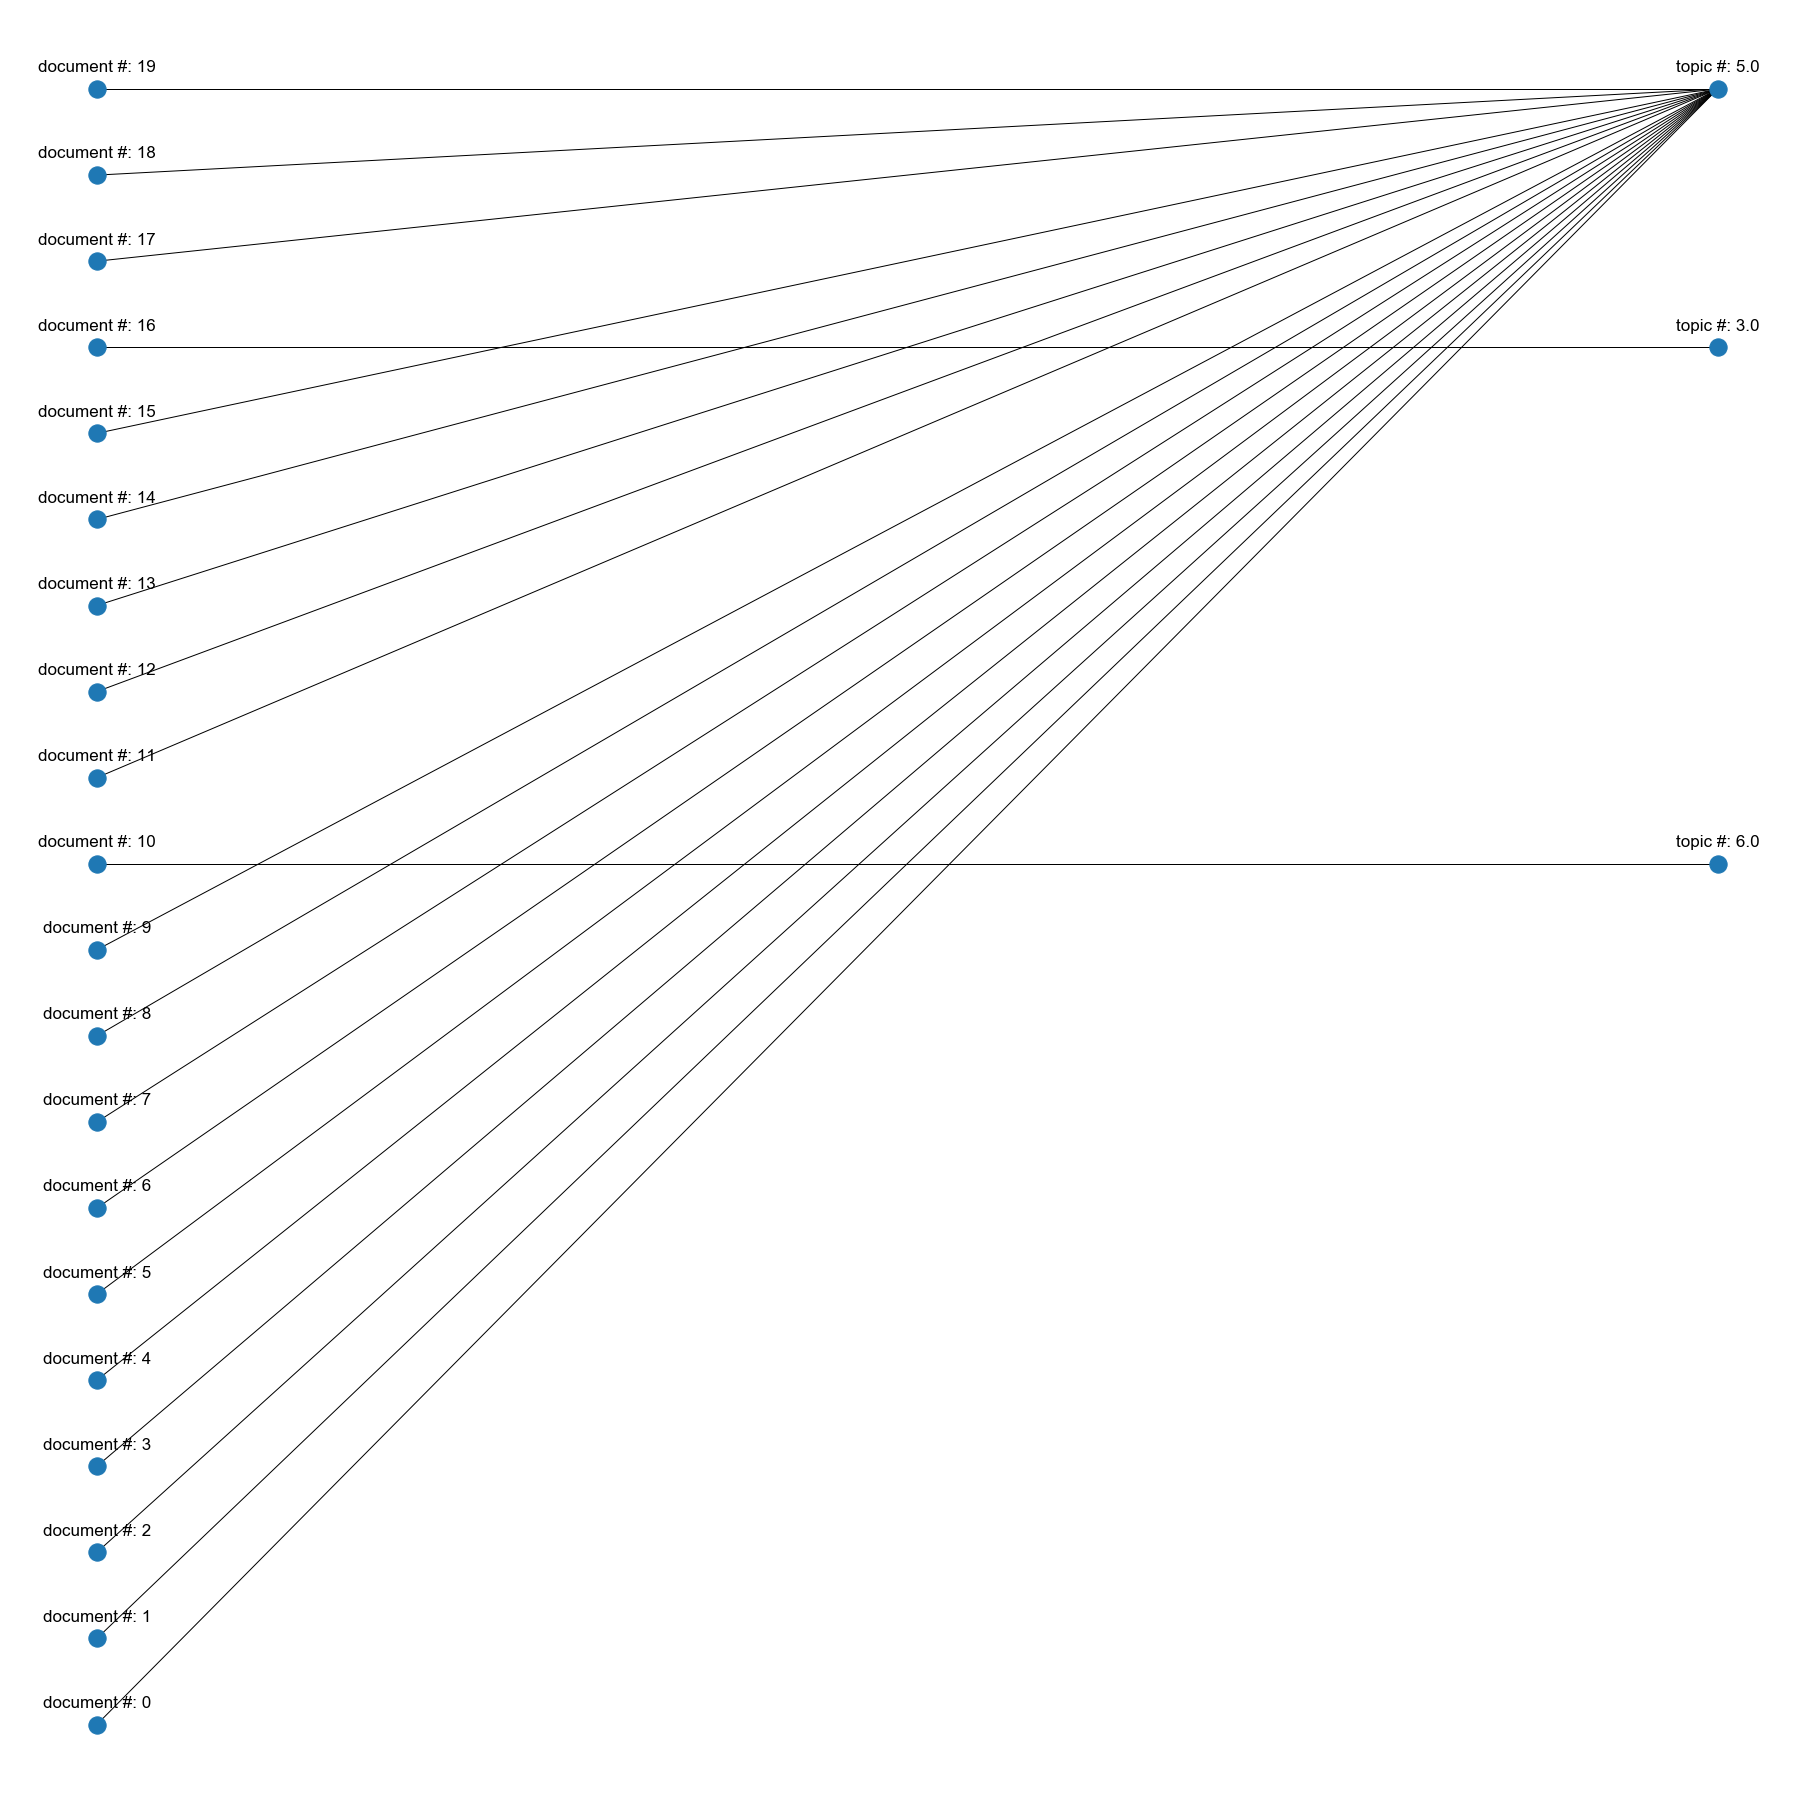

In [58]:
import networkx as nx
from networkx.algorithms import bipartite

sent_topics_sorteddf_mallet['topic_text'] = sent_topics_sorteddf_mallet[[
    'Topic_Num', 'Text_idx']].apply(tuple, axis=1)
# print(list(sent_topics_sorteddf_mallet['topic_text']))
# print('\n')
# print(list(sent_topics_sorteddf_mallet['Topic_Num']))
# print('\n')
# print(list(sent_topics_sorteddf_mallet['Text_idx']))
# print('\n')
# print(list(zip(list(sent_topics_sorteddf_mallet['Topic_Num']), list(
#     sent_topics_sorteddf_mallet['Text_idx']))))


def plot_bipartite_topic2text(data_frame, subdomian_col, domain_col):
    B = nx.Graph()
    B.add_nodes_from(data_frame[subdomian_col], bipartite=0)
    B.add_nodes_from(data_frame[domain_col], bipartite=1)
    B.add_weighted_edges_from([(row[domain_col], row[subdomian_col], 1)
                               for idx, row in data_frame.iterrows()], weight='weight')

    # print(B.edges(data=True))

    plt.figure(3, figsize=(25, 25))
    pos = {node: [0, i] for i, node in enumerate(data_frame[domain_col])}
    pos.update({node: [1, i]
                for i, node in enumerate(data_frame[subdomian_col])})
    nx.draw(B, pos, with_labels=False)
    for p in pos:  # raise text positions
        pos[p][1] += 0.25
    nx.draw_networkx_labels(B, pos, node_size=65, font_size=17)

    plt.savefig('bipartite_graph_doc2topic.png')
    plt.show()


#plot_bipartite_topic2text(sent_topics_sorteddf_mallet, 'Topic_Num', 'Text_idx')
plot_bipartite_topic2text(df_dominant_topic.head(20),
                          'Dominant_Topic_ID', 'Text_ID')

179
      Topic_Perc_Contrib  Dominant_Topic  Document_No
10                0.7012             6.0           10
16                0.9944             3.0           16
20                0.9892             6.0           20
27                0.9692             7.0           27
29                0.9892             6.0           29
...                  ...             ...          ...
2846              0.9921             1.0         2846
2881              0.9954             1.0         2881
2882              0.9921             1.0         2882
2923              0.9961             8.0         2923
2960              0.9802             7.0         2960

[179 rows x 3 columns]
      Topic_Perc_Contrib  Dominant_Topic  Document_No
0                    0.2             5.0          0.0
1                    0.2             5.0          1.0
2                    0.2             5.0          2.0
3                    0.2             5.0          3.0
4                    0.2             5.0          4.0


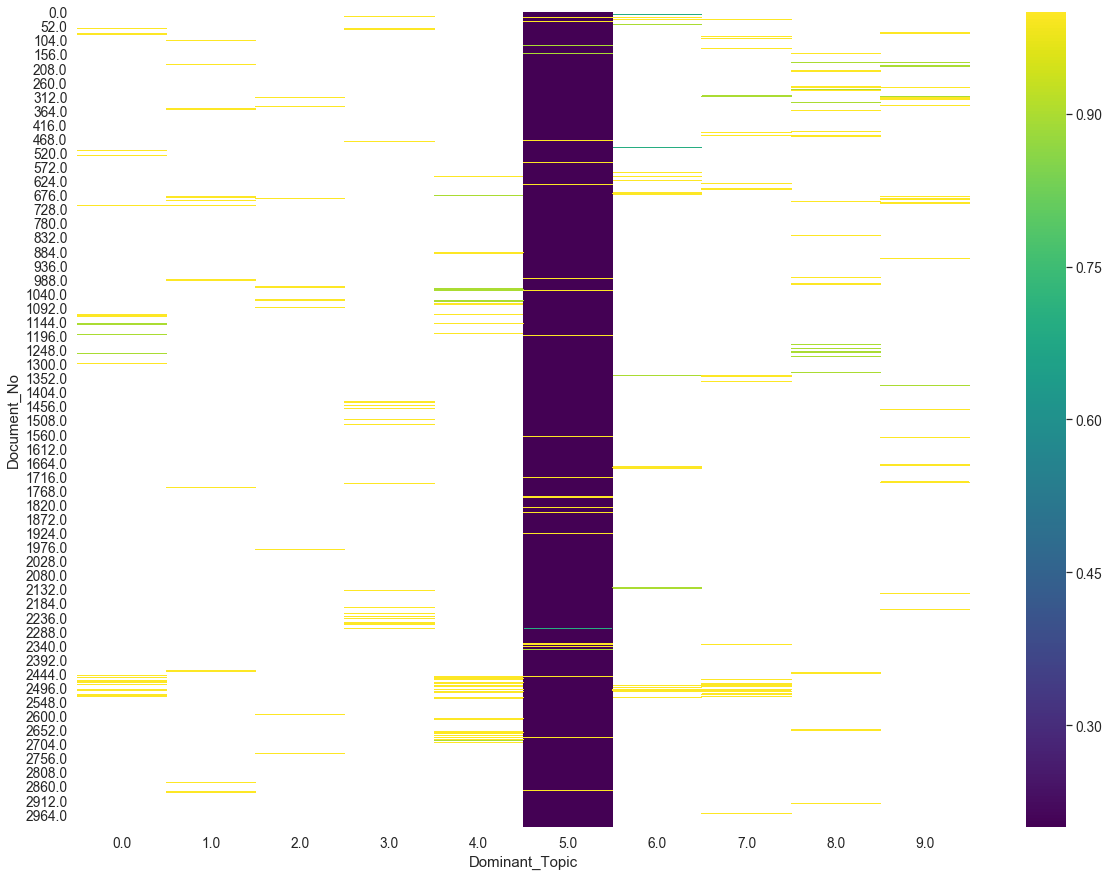

In [103]:
import seaborn as sns

df_dominant = df_dominant_topic[['Topic_Perc_Contrib', 'Dominant_Topic', 'Document_No']].copy()

print(len(df_dominant[(df_dominant['Dominant_Topic'] != 5.0)]))
print(df_dominant[(df_dominant['Dominant_Topic'] != 5.0)])

df_dominant = df_dominant[df_dominant.columns].astype(float)
df_dominant = df_dominant.round(1)

plt.figure(figsize=(20,15))

print(df_dominant)

result = df_dominant.pivot(index='Document_No', columns='Dominant_Topic', values='Topic_Perc_Contrib')
sns.heatmap(result, fmt="g", cmap='viridis')

plt.savefig('Dominant_Topics.png')
plt.show()

# Let's analyze the LDA model results through visualization, we will use pyLDAvis to interact with the results in order to:
1. Understand the individual results better -- Manually select each topic to view it's top most frequent and/or "relevant terms using different values of λ. This can be of aid when assigning human interpretable name or "meaning" to each topic.
2. Understand the relationships between the topics -- Explore Intertopic Distance Plot that can assist in learning how topics relate to each other to reveal potential higher-level structure between groups of topics.

<ul>
<li>Each buble on the left-hand side represents a topic, the larger the topic, the more prevalent that topic is.</li>
    
<li>A good topic model should have fairly large, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.</li>
    
<li>A model with too many topics will typically have many overlaps and small sized bubbles clustered in one region.</li>
    
<li>If you hover over one of the bubbles, the words and bars on the right side will update, these words are the salient keywords that form the selected topic.</li>

<li>The alpha parameter represents document-topic density -- a higher alpha means that documents are made up of more topics and result in more specific topic distributions per document.</li>
</ul>

In [ ]:
%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
pyLDAvis.save_html(vis, 'lda.html')